# AI Tensorflow: Part 5- Multi-class Classification (Rock-Paper-Scissors)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Import and Extract Dataset

In [2]:
zip_ref = zipfile.ZipFile('archive.zip')
zip_ref.extractall('dataset')
zip_ref.close()

## Build the Model

In [2]:
model = tf.keras.Sequential([
    # Put desired size of image 150x150
    # First convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Second convolutions
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Third convolutions
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Forth convolutions
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # Dropout layer with 0.5 probability
    tf.keras.layers.Dropout(0.5),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Output layer with 3 neuron for 3 classes (rock/paper/scissors)
    tf.keras.layers.Dense(3, activation='softmax')
])

C:\Users\sajad\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Set the training parameters
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [5]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = training_datagen.flow_from_directory('dataset/Rock-Paper-Scissors/train',
                                                      target_size=(150,150),
                                                      class_mode='categorical',
                                                      batch_size=126)

validation_generator = validation_datagen.flow_from_directory('dataset/Rock-Paper-Scissors/test',
                                                             target_size=(150,150),
                                                             class_mode='categorical',
                                                             batch_size=126)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [14]:
# Train the model
history = model.fit(train_generator, steps_per_epoch=20 ,epochs=30, validation_data=validation_generator, verbose=1, validation_steps=3)
model.save('model.h5')

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 113s 6s/step - accuracy: 0.5148 - loss: 0.9577 - val_accuracy: 0.8360 - val_loss: 0.4905
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 6s/step - accuracy: 0.6210 - loss: 0.7672 - val_accuracy: 0.9543 - val_loss: 0.3257
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 6s/step - accuracy: 0.6467 - loss: 0.7874 - val_accuracy: 0.8065 - val_loss: 0.3728
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 114s 6s/step - accuracy: 0.7285 - loss: 0.6262 - val_accuracy: 0.8387 - val_loss: 0.2960
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 113s 6s/step - accuracy: 0.7060 - loss: 0.6229 - val_accuracy: 0.9704 - val_loss: 0.16

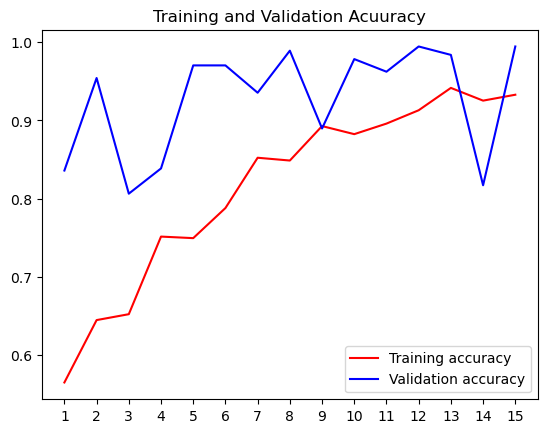

In [30]:
# Plot train and validation accuracy
acc = history.history['accuracy'][0::2]
val_acc = history.history['val_accuracy']

epochs = range(1,16)

plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xticks(epochs)
plt.title('Training and Validation Acuuracy')
plt.legend()
plt.show()